In [123]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import hvplot.pandas 
import hvplot

In [36]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [37]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [38]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
normalized_data = scaler.fit_transform(market_data_df)

In [39]:
# Create a DataFrame with the scaled data
market_data_df_normalized = pd.DataFrame(normalized_data, columns=market_data_df.columns)

# Copy the crypto names from the original data

market_data_df_normalized['coin_id'] = market_data_df.index.tolist()

# Set the coinid column as index
market_data_df_normalized.set_index('coin_id', inplace=True)

# Display sample data
market_data_df_normalized.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
0,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
1,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
2,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
3,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
4,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
5,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
6,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
7,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
8,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


### Find the Best Value for k Using the Original Scaled DataFrame.

In [40]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = []
for index in range(1, 11):
    k_values.append(index)
print(f"\n k values: \n {k_values}")

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list

for k_value in k_values:
    kmeans = KMeans(n_clusters = k_value)
    kmeans.fit(market_data_df_normalized)
    inertia.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_curve_data = {
    'k value' : k_values,
    'inertia' : inertia
}
# for index in range(len(k_values)):
#     elbow_curve_data[k_values[index]] = inertia[index]

print(f"\n Data Array: \n {elbow_curve_data}")

# Create a DataFrame with the data to plot the Elbow curve
elbow_curve_df = pd.DataFrame(elbow_curve_data)

# Display the DataFrame
print(f"\n Data in Dataframe \n {elbow_curve_df}")


 k values: 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

 Data Array: 
 {'k value': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'inertia': [287.0, 198.57181809798126, 123.19048183836958, 90.71030156269275, 68.4092360937502, 59.01120389846736, 45.84405432743459, 37.324023979526636, 32.76876235030065, 28.22950619825807]}

 Data in Dataframe 
    k value     inertia
0        1  287.000000
1        2  198.571818
2        3  123.190482
3        4   90.710302
4        5   68.409236
5        6   59.011204
6        7   45.844054
7        8   37.324024
8        9   32.768762
9       10   28.229506


<Axes: xlabel='k value'>

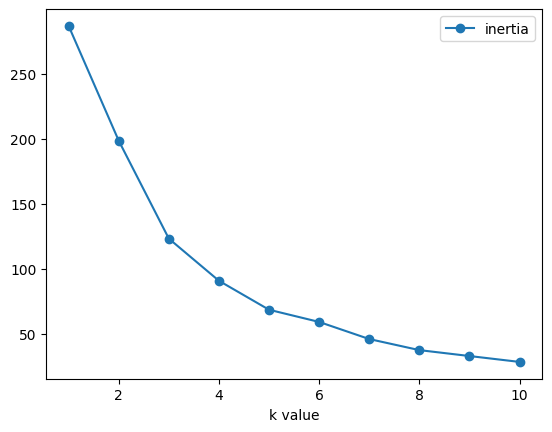

In [41]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_curve_df.plot(x='k value', y='inertia', kind='line', marker='o')


#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:**
K = 4

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [42]:
# Initialize the K-Means model using the best value for k
best_k = 4
kmeans_model = KMeans(n_clusters=best_k, random_state=42)


In [43]:
# Fit the K-Means model using the scaled data
kmeans_model.fit(market_data_df_normalized)


KMeans(n_clusters=4, random_state=42)

In [55]:
# Predict the clusters to group the cryptocurrencies using the scaled data
predicted_clusters = kmeans_model.predict(market_data_df_normalized)
# View the resulting array of cluster values.
print(f"{predicted_clusters}")
print(f"\n Type: {type(predicted_clusters)}")


[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]

 Type: <class 'numpy.ndarray'>


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
0,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
1,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
2,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
3,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
4,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
5,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
6,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
7,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
8,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


In [56]:
# Create a copy of the DataFrame
market_data_df_normalized_copy = market_data_df_normalized.copy()
market_data_df_normalized_copy.head(10)


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
0,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
1,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
2,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
3,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
4,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
5,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
6,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
7,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
8,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


In [57]:
# Add a new column to the DataFrame with the predicted clusters
market_data_df_normalized_copy['crypto_cluster'] = predicted_clusters

# Display sample data
market_data_df_normalized_copy.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,crypto_cluster
coin_id,,,,,,,,
0,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
1,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
2,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,2
3,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,2
4,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0
5,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,0
6,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,0
7,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,0
8,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,0


<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

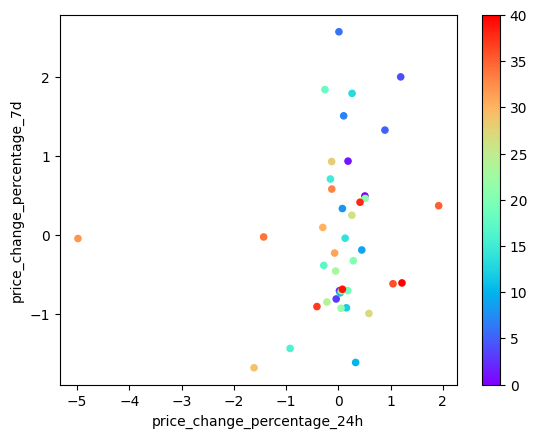

In [77]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
market_data_df_normalized_copy.plot(x='price_change_percentage_24h', 
                                    y='price_change_percentage_7d', 
                                    kind='scatter', 
                                    c=market_data_df_normalized_copy.index, 
                                    colormap='rainbow',
                                    colorbar=True)

### Optimize Clusters with Principal Component Analysis.

In [78]:
# Create a PCA model instance and set `n_components=3`.
pca_model = PCA(n_components=3)

In [92]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_fit = pca_model.fit_transform(market_data_df_normalized)
pca_df = pd.DataFrame(pca_fit, columns=['PCA1', 'PCA2', 'PCA3'])

# View the first five rows of the DataFrame. 
pca_df.head(5)

,PCA1,PCA2,PCA3
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715


In [94]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance = pca_model.explained_variance_ratio_

print("Explained Variance Ratio for each principal component:")
for index, var in enumerate(explained_variance, start=1):
    print(f"PCA{index}: {var:.4f}")


Explained Variance Ratio for each principal component:
PCA1: 0.3720
PCA2: 0.3470
PCA3: 0.1760


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 

In [95]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data


# Copy the crypto names from the original data
pca_df['coin_id'] = market_data_df.index.tolist()

# Set the coinid column as index
pca_df.set_index('coin_id', inplace=True)

# Display sample data
pca_df.head(10)

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


### Find the Best Value for k Using the PCA Data

[What is PCA (video)](https://www.youtube.com/watch?v=FgakZw6K1QQ)

In [96]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11

k_values = []
for index in range(1, 11):
    k_values.append(index)
print(f"\n k values: \n {k_values}")

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for k_value in k_values:
    kmeans = KMeans(n_clusters = k_value)
    kmeans.fit(pca_df)
    inertia.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_curve_data = {
    'k value' : k_values,
    'inertia' : inertia
}
print(f"\n Data Array: \n {elbow_curve_data}")

# Create a DataFrame with the data to plot the Elbow curve
elbow_curve_df = pd.DataFrame(elbow_curve_data)

# Display the DataFrame
print(f"\n Data in Dataframe \n {elbow_curve_df}")


 k values: 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

 Data Array: 
 {'k value': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'inertia': [256.8740855678925, 168.81189630685222, 115.91807663320066, 49.665496651797376, 39.17443868509607, 32.23090693499442, 21.822392084398285, 19.014225234565654, 14.541256403630129, 11.407666572096911]}

 Data in Dataframe 
    k value     inertia
0        1  256.874086
1        2  168.811896
2        3  115.918077
3        4   49.665497
4        5   39.174439
5        6   32.230907
6        7   21.822392
7        8   19.014225
8        9   14.541256
9       10   11.407667


<Axes: xlabel='k value'>

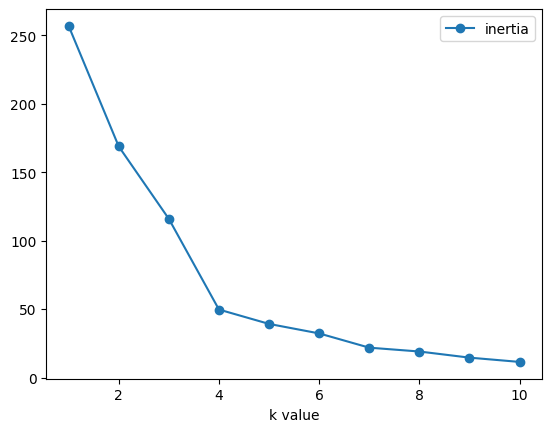

In [97]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_curve_df.plot(x='k value', y='inertia', kind='line', marker='o')

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 
    k=4

* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 
    NO

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [98]:
# Initialize the K-Means model using the best value for k
best_k = 4
kmeans_model = KMeans(n_clusters=best_k, random_state=42)

In [99]:
# Fit the K-Means model using the PCA data
kmeans_model.fit(pca_df)


KMeans(n_clusters=4, random_state=42)

In [102]:
# Predict the clusters to group the cryptocurrencies using the PCA data
predicted_clusters = kmeans_model.predict(pca_df)

# Print the resulting array of cluster values.
print(f"{predicted_clusters}")
print(f"\n Type: {type(predicted_clusters)}")

[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]

 Type: <class 'numpy.ndarray'>


In [103]:
# Create a copy of the DataFrame with the PCA data
pca_df_copy = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_df_copy['crypto_cluster'] = predicted_clusters

# Display sample data
pca_df_copy.head(10)

,PCA1,PCA2,PCA3,crypto_cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,2
ripple,-0.471835,-0.222660,-0.479053,2
bitcoin-cash,-1.157800,2.041209,1.859715,0
binancecoin,-0.516534,1.388377,0.804071,0
chainlink,-0.450711,0.517699,2.846143,0
cardano,-0.345600,0.729439,1.478013,0
litecoin,-0.649468,0.432165,0.600303,0


In [122]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 

my_hvplot = pca_df_copy.hvplot.scatter(x='PCA1', 
                 y='PCA2', 
                 color='blue',
                 colorbar=True)
hvplot.save(my_hvplot, 'hvplot.html')

AttributeError: 'Scatter' object has no attribute 'save'

### Determine the Weights of Each Feature on each Principal Component

In [ ]:
# Use the columns from the original scaled DataFrame as the index.


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
    